<a href="https://colab.research.google.com/github/Ilyagu/TMO/blob/master/RK1/RK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [ ]:
data = pd.read_csv('sample_data/states_all.csv')

In [ ]:
data.head()

PRIMARY_KEY       STATE  ...  AVG_READING_4_SCORE  AVG_READING_8_SCORE
0     1992_ALABAMA     ALABAMA  ...                207.0                  NaN
1      1992_ALASKA      ALASKA  ...                  NaN                  NaN
2     1992_ARIZONA     ARIZONA  ...                209.0                  NaN
3    1992_ARKANSAS    ARKANSAS  ...                211.0                  NaN
4  1992_CALIFORNIA  CALIFORNIA  ...                202.0                  NaN

[5 rows x 25 columns]

In [ ]:
data.shape

(1715, 25)

In [ ]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [ ]:
# находим пустые значения
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

# Обработка ненужных данных

In [ ]:
# удаление ненужных столбцов
data.drop(['INSTRUCTION_EXPENDITURE', 'YEAR'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   float64
 4   FEDERAL_REVENUE               1275 non-null   float64
 5   STATE_REVENUE                 1275 non-null   float64
 6   LOCAL_REVENUE                 1275 non-null   float64
 7   TOTAL_EXPENDITURE             1275 non-null   float64
 8   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 9   OTHER_EXPENDITURE             1224 non-null   float64
 10  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 11  GRADES_PK_G                   1542 non-null   float64
 12  GRADES_KG_G                   1632 non-null   float64
 13  GRA

In [ ]:
# заполняем отсутствующие значения на средние
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].replace(0, np.nan)
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].fillna(data['TOTAL_REVENUE'].mean())

In [ ]:
data.head()

PRIMARY_KEY       STATE  ...  AVG_READING_4_SCORE  AVG_READING_8_SCORE
0     1992_ALABAMA     ALABAMA  ...                207.0                  NaN
1      1992_ALASKA      ALASKA  ...                  NaN                  NaN
2     1992_ARIZONA     ARIZONA  ...                209.0                  NaN
3    1992_ARKANSAS    ARKANSAS  ...                211.0                  NaN
4  1992_CALIFORNIA  CALIFORNIA  ...                202.0                  NaN

[5 rows x 23 columns]

In [ ]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
ENROLL                           491
TOTAL_REVENUE                      0
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

# Обработка пропусков категориальных данных

In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [ ]:
data['STATE'] = data.fillna("Nane")
data.head()

PRIMARY_KEY            STATE  ...  AVG_READING_4_SCORE  AVG_READING_8_SCORE
0     1992_ALABAMA     1992_ALABAMA  ...                207.0                  NaN
1      1992_ALASKA      1992_ALASKA  ...                  NaN                  NaN
2     1992_ARIZONA     1992_ARIZONA  ...                209.0                  NaN
3    1992_ARKANSAS    1992_ARKANSAS  ...                211.0                  NaN
4  1992_CALIFORNIA  1992_CALIFORNIA  ...                202.0                  NaN

[5 rows x 23 columns]

In [ ]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
ENROLL                           491
TOTAL_REVENUE                      0
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

# Корреляционный анализ

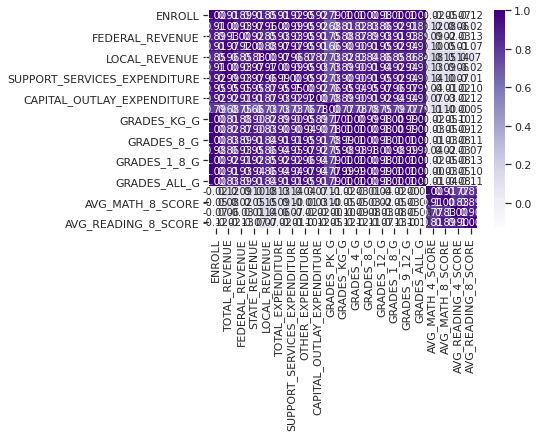

In [ ]:
sns.heatmap(data.corr(), cmap = 'Purples', annot = True, fmt = '.3f')

In [ ]:
data.corr()

ENROLL  ...  AVG_READING_8_SCORE
ENROLL                        1.000000  ...            -0.119316
TOTAL_REVENUE                 0.913978  ...            -0.017904
FEDERAL_REVENUE               0.893697  ...            -0.127963
STATE_REVENUE                 0.914379  ...            -0.068674
LOCAL_REVENUE                 0.846851  ...             0.065997
TOTAL_EXPENDITURE             0.914920  ...            -0.018308
SUPPORT_SERVICES_EXPENDITURE  0.917475  ...            -0.010603
OTHER_EXPENDITURE             0.953018  ...            -0.095614
CAPITAL_OUTLAY_EXPENDITURE    0.918076  ...            -0.120218
GRADES_PK_G                   0.786993  ...            -0.049804
GRADES_KG_G                   0.995072  ...            -0.121848
GRADES_4_G                    0.997529  ...            -0.116347
GRADES_8_G                    0.998371  ...            -0.110011
GRADES_12_G                   0.983393  ...            -0.070290
GRADES_1_8_G                  0.999096  ...            -0.126496
GRADES_9_12_G                 0.997224  ...            -0.096466
GRADES_ALL_G                  0.998879  ...            -0.108974
AVG_MATH_4_SCORE             -0.017301  ...             0.813690
AVG_MATH_8_SCORE             -0.047459  ...             0.892087
AVG_READING_4_SCORE          -0.072597  ...             0.896509
AVG_READING_8_SCORE          -0.119316  ...             1.000000

[21 rows x 21 columns]

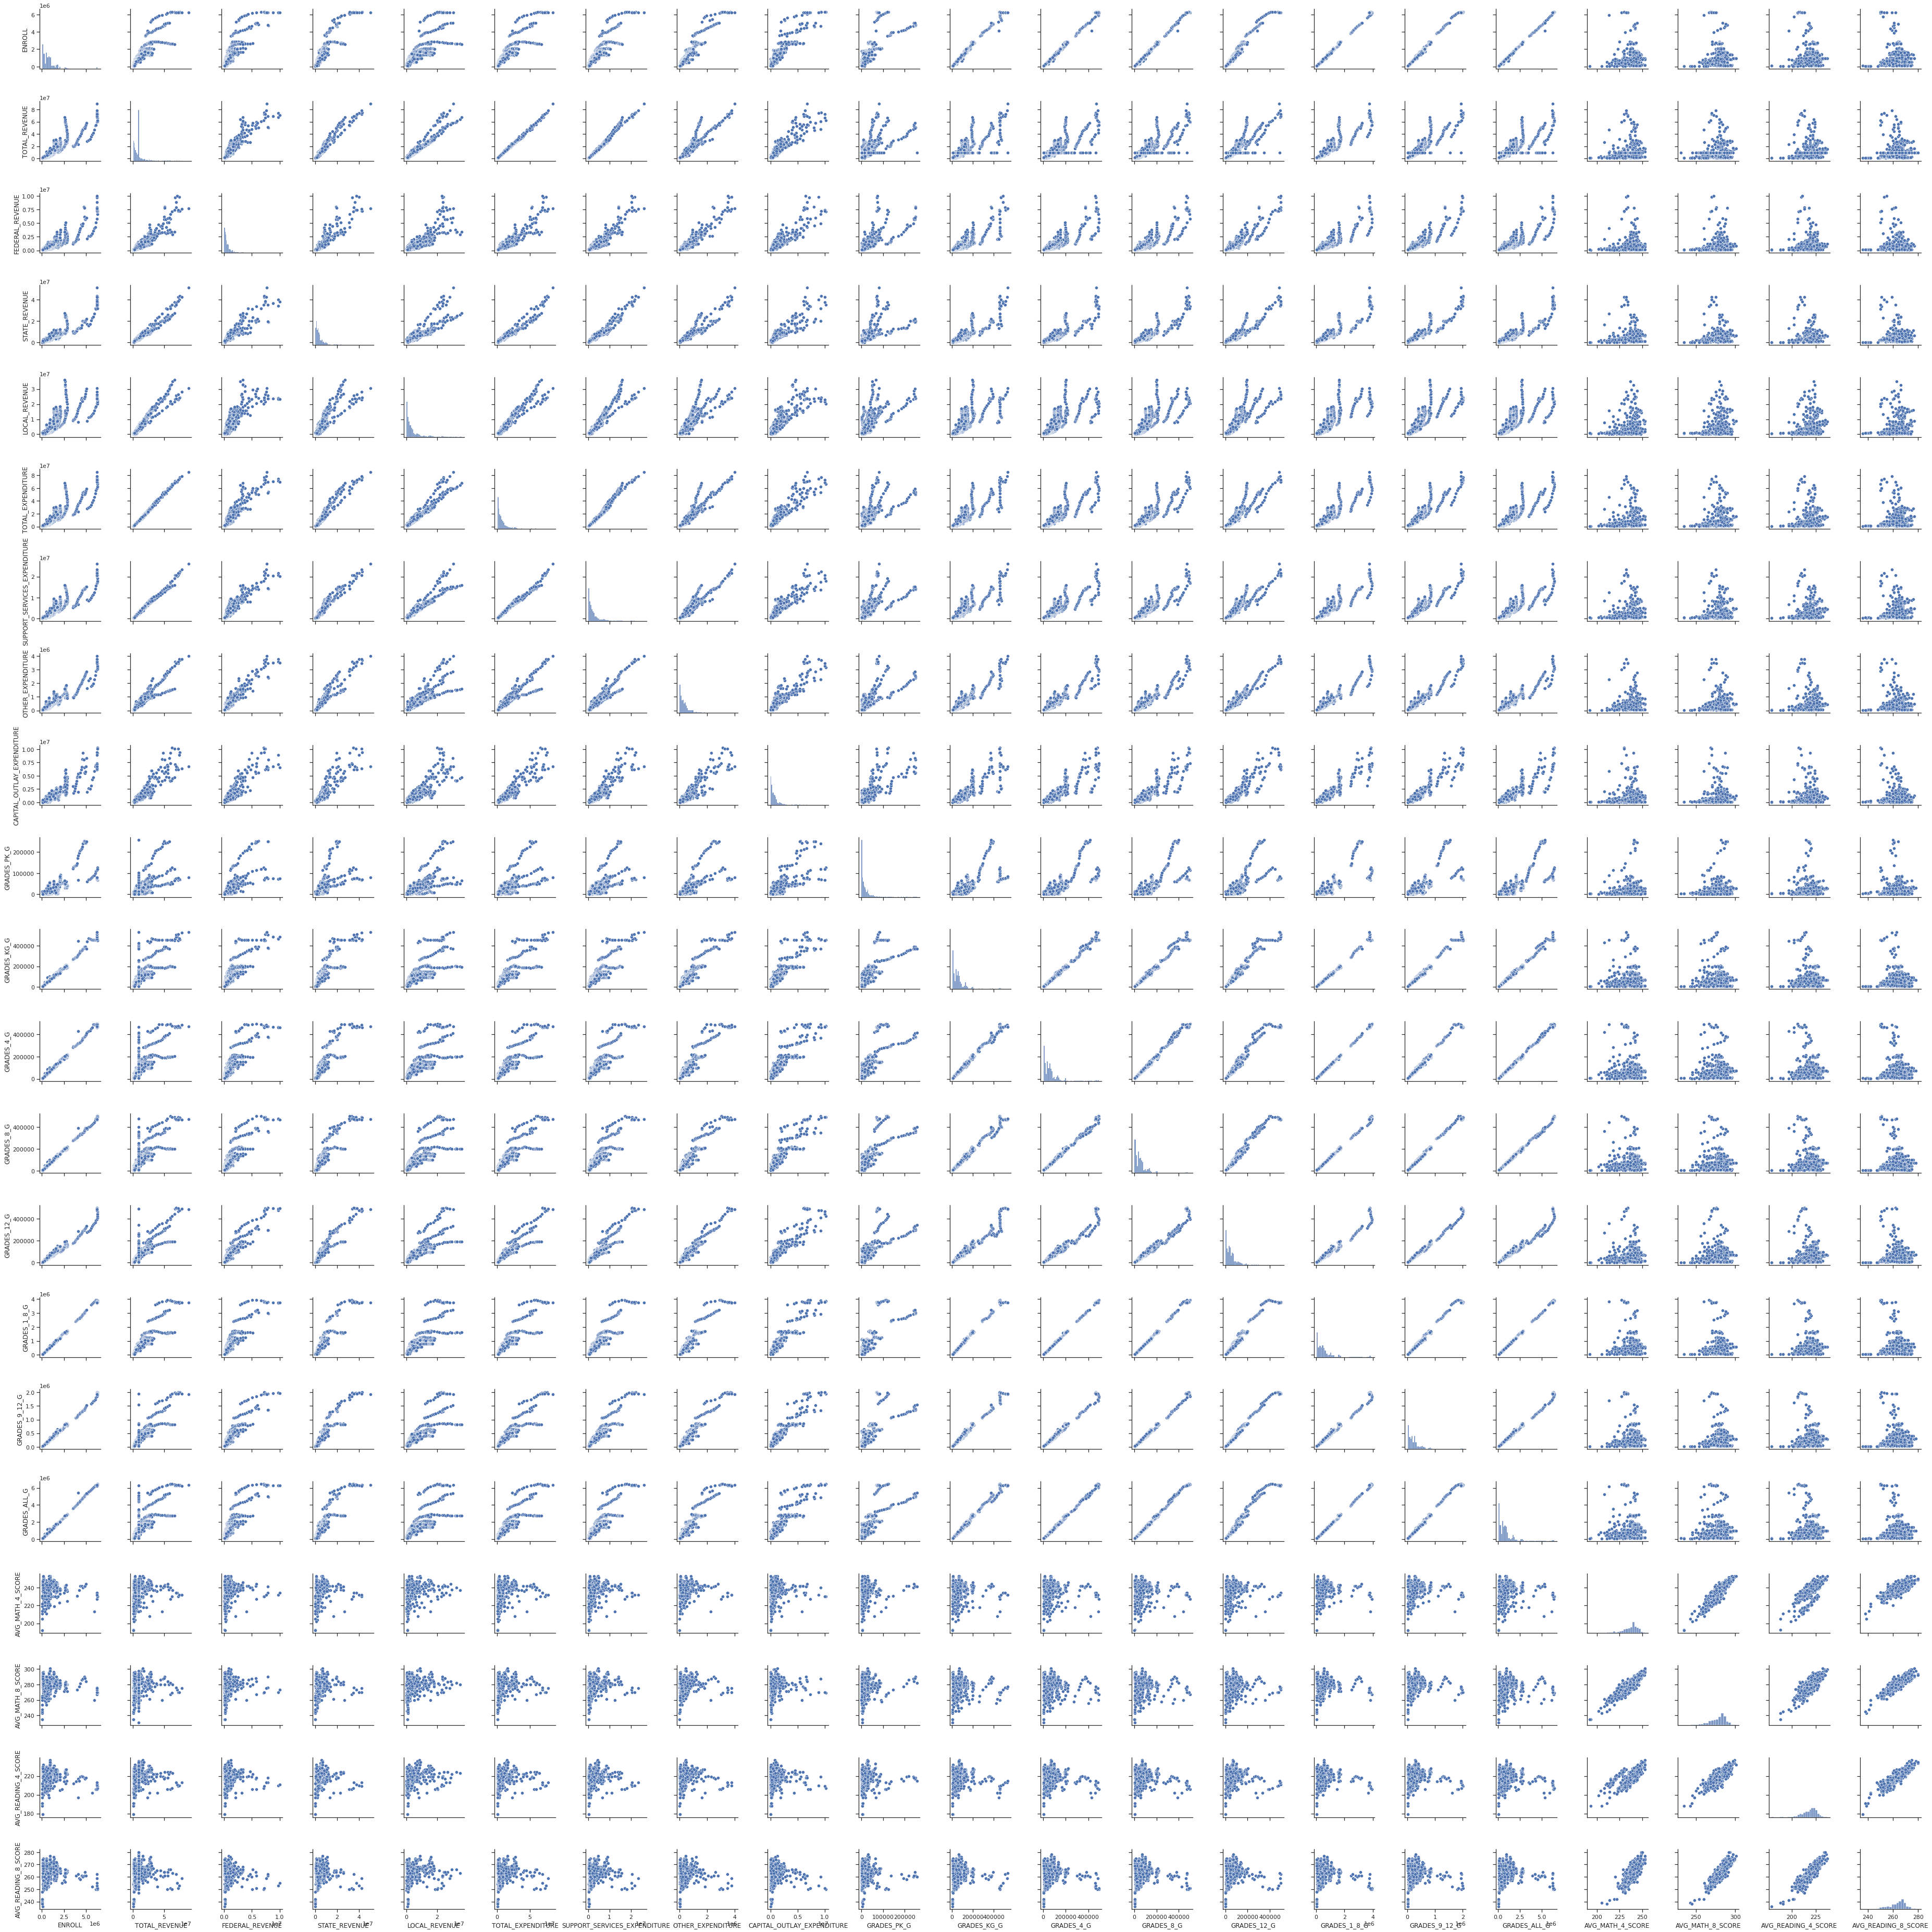

In [ ]:
sns.pairplot(data)

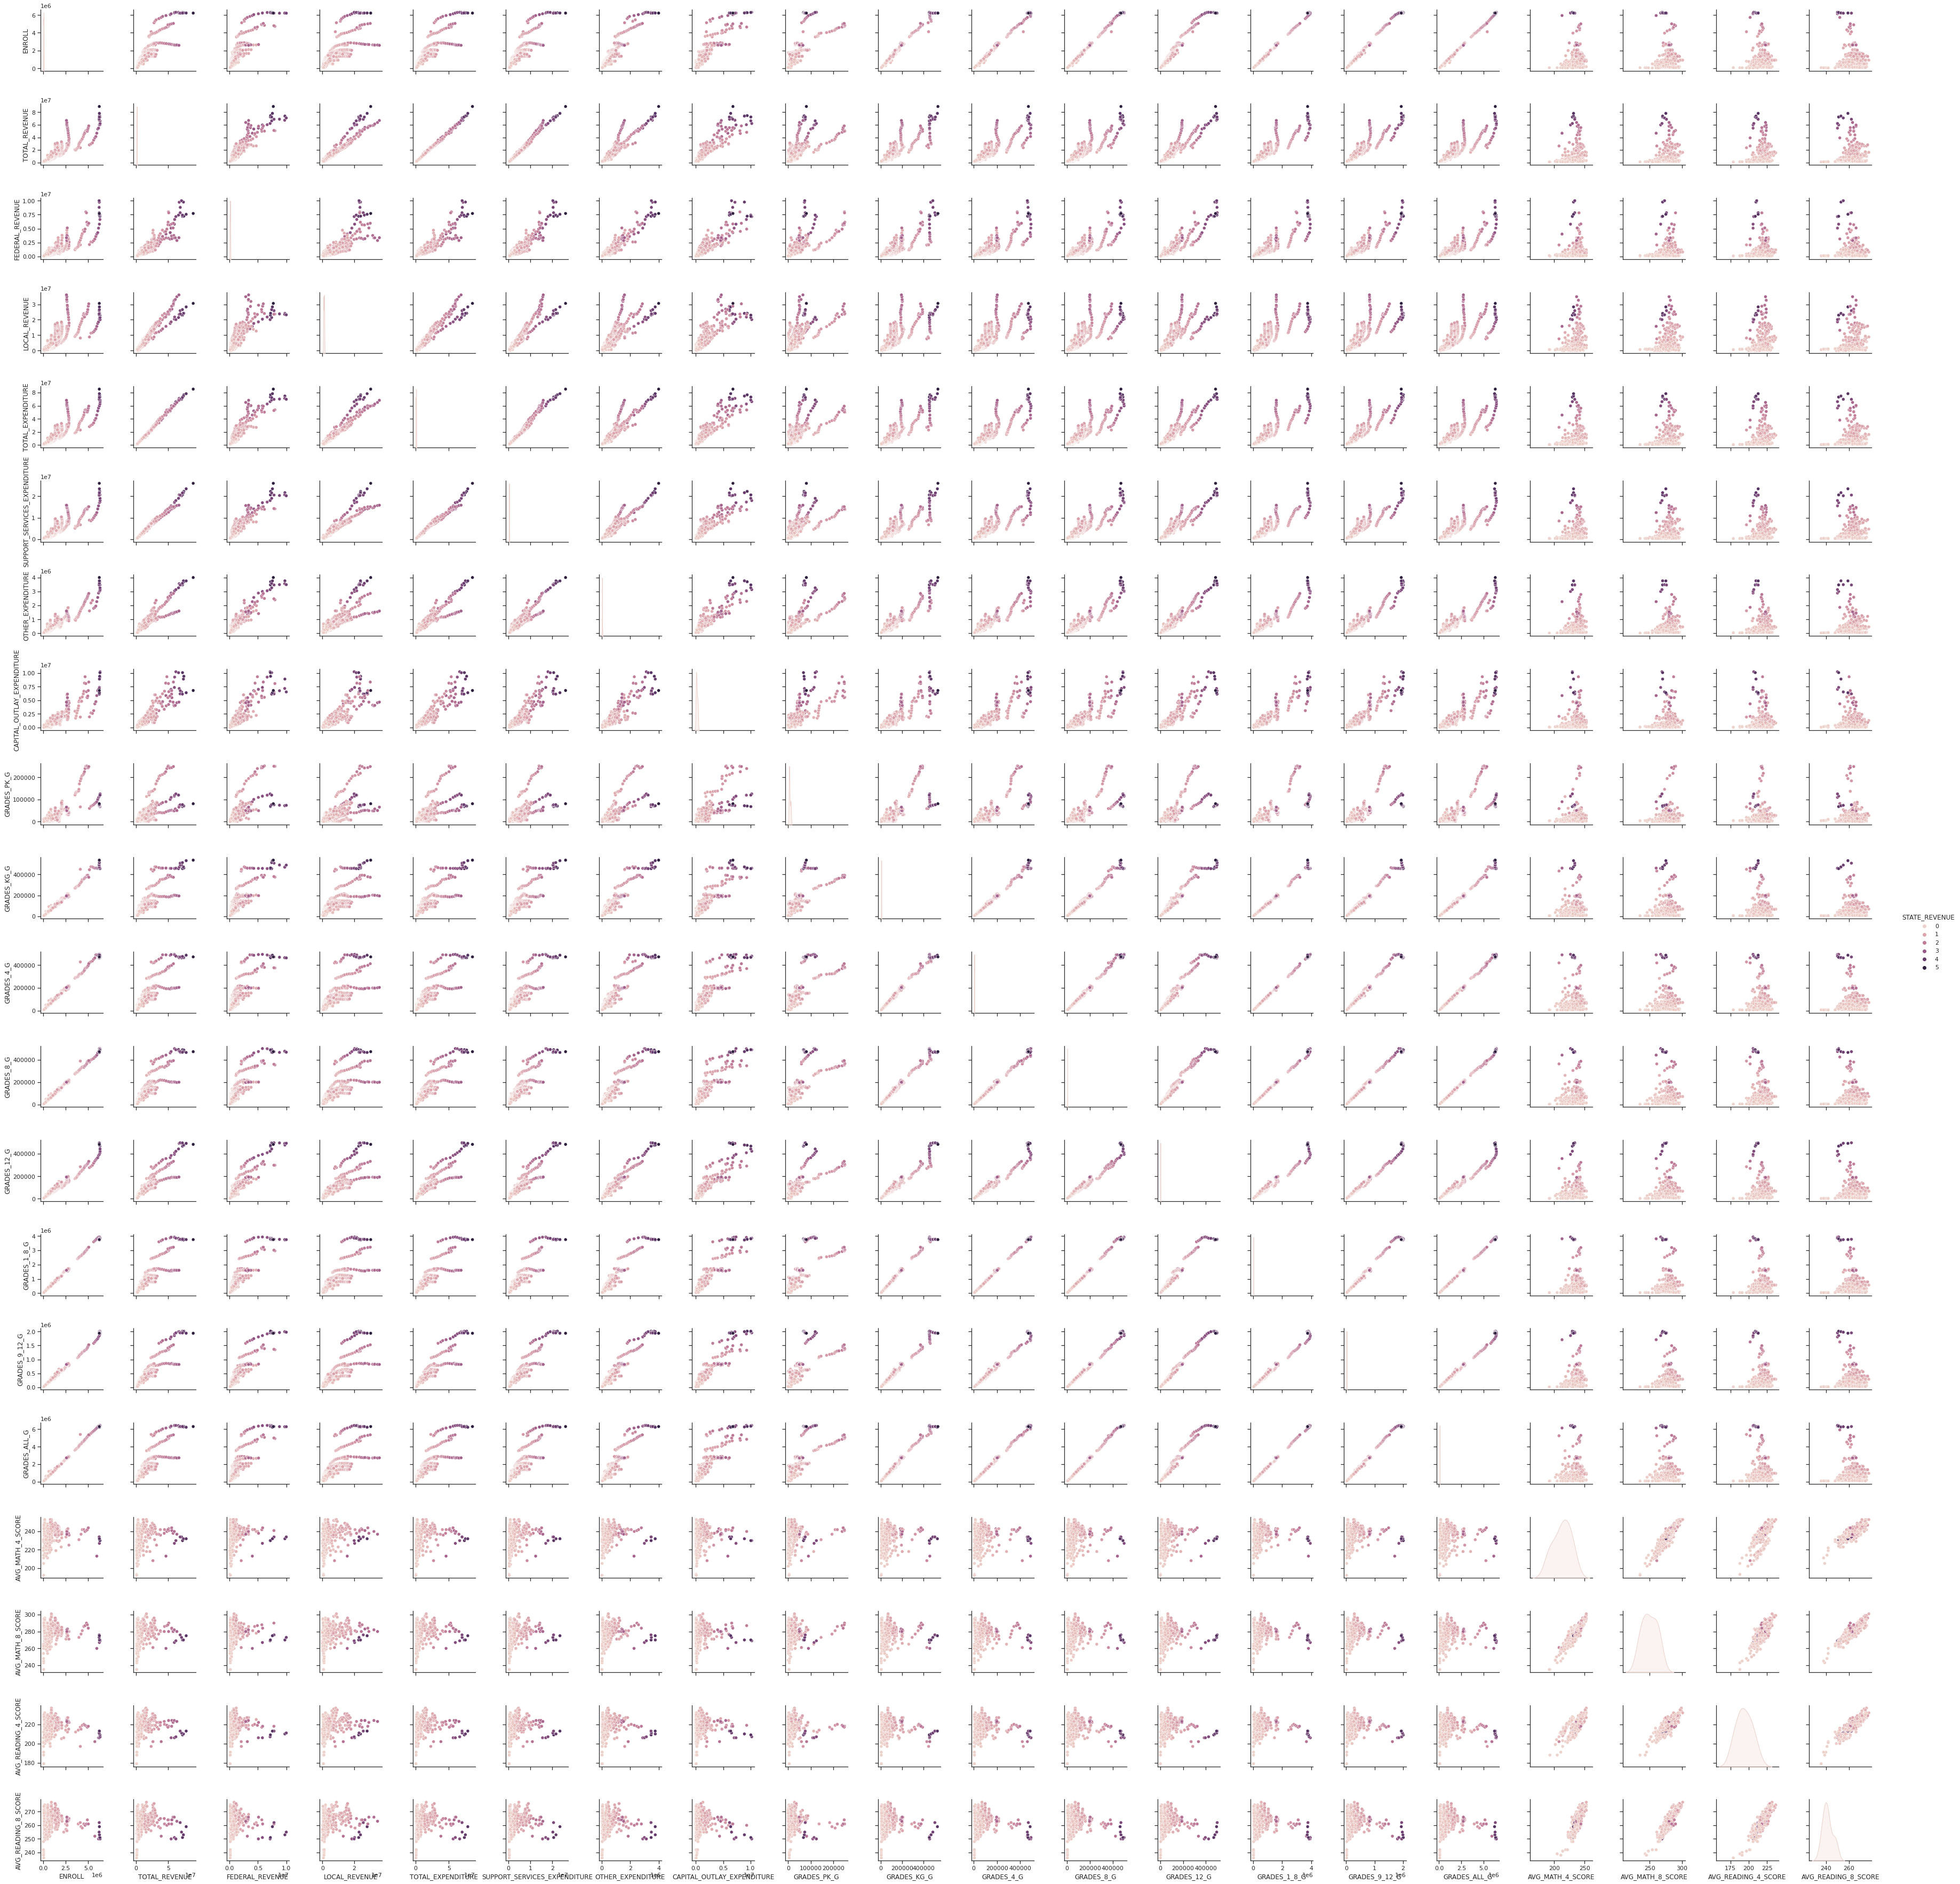

In [ ]:
sns.pairplot(data, hue = 'STATE_REVENUE')